## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


## Generate data

X [[ 0.17640523 -0.04837975  3.00395099  2.16057371 -0.10517378 -0.01855321]
 [ 0.13984914  0.32847254  3.03383776  1.89052903  0.21265031  0.02973896]
 [ 0.29654313  0.38435079  2.91578168  2.12583722  0.27954611  0.08289748]
 [ 0.51960953  0.57123257  2.99503677  2.14580907  0.68264116  0.35470685]
 [ 0.57617414  0.74538793  2.87697546  1.97077968  0.60628914  0.34932812]
 [ 0.38169775  0.91970676  2.90112073  2.06723926  1.01889409  0.38890958]
 [ 0.65965132  1.06804433  3.06020746  2.09316863  0.98003401  0.64648072]
 [ 0.62908197  1.22078298  2.98404514  2.10442932  0.83640144  0.52616506]
 [ 0.70703421  1.56743515  2.8716652   2.00828541  0.93021428  0.65769332]
 [ 0.82438676  1.52178427  2.87617799  1.94159486  0.87491239  0.72126619]]


Using TensorFlow backend.


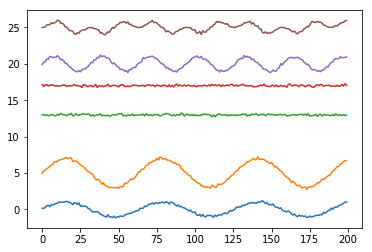

In [2]:
N=100000
X = np.zeros(shape=(N,6))
# X[:,0] = 2*np.ones(shape=(N,))
# X[:,1] = 3*np.ones(shape=(N,))
# X[:,2] = 4*np.ones(shape=(N,))
sigma = 0.1
xt=np.arange(0,N/10,1/10)
X[:,0] = 1*np.sin(1*xt) + np.random.normal(0, sigma, N) # first sine wave
X[:,1] = 2*np.sin(1*xt) + np.random.normal(0, sigma, N) # close duplicate of col above
X[:,2] = np.random.normal(3, sigma, N) # first flat
X[:,3] = np.random.normal(2, sigma, N) # close duplicate of col above
X[:,4] = np.sin(2*xt) + np.random.normal(0, sigma, N) # second sine wave of new frequency

# Case 1: keep col 5 at 0
# Performances in descending order:
# - PCA with dimensionality reduction
# - AE with PCA (after dimensionality reduction)
#    - Note: even just dropping the col5=0 makes a difference
# - AE with PCA without dimensionality reduction
# - AE without PCA
#
# Case 2: make col 5 a linear combination of 0 and 4
# X[:,5] = X[:,0]+X[:,4]
#
# Case 2: make col 5 a non-linear combination of 0 and 4
X[:,5] = X[:,0]*X[:,4]

print('X',X[0:10,:])

from utils import myPlot
myPlot(X)

## Normalize

X normalized [[ 0.57256629  0.48237672  0.50144069  0.68264278  0.45789738  0.49970711]
 [ 0.55996018  0.56194547  0.5381266   0.3728326   0.57438926  0.51835497]
 [ 0.61399499  0.57374362  0.39321318  0.64279116  0.59890853  0.53888196]
 [ 0.69091786  0.61320192  0.49049852  0.66570397  0.74665473  0.64384027]
 [ 0.71042376  0.64997315  0.34557868  0.46490058  0.71866947  0.64176329]
 [ 0.64335996  0.6867789   0.37521691  0.57556434  0.86990132  0.65704755]
 [ 0.73921027  0.71809896  0.57049531  0.60531194  0.85565796  0.75650781]
 [ 0.72866865  0.75034826  0.47700633  0.61823083  0.8030124   0.71004831]
 [ 0.75554993  0.82354054  0.33906036  0.50792923  0.83739756  0.76083752]
 [ 0.79601813  0.81390179  0.34459979  0.43141814  0.81712779  0.78538598]]


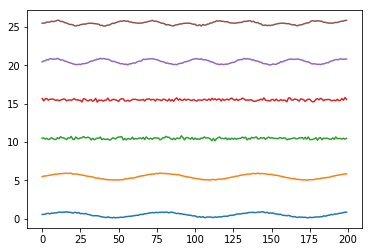

In [3]:
from utils import myNorm3

X_norm = myNorm3(X)
print("X normalized",X_norm[0:10,:])

# plot
myPlot(X_norm)

## AE without PCA: reduce to 3

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 2s - loss: 0.0438 - val_loss: 0.0376
Epoch 2/25
80000/80000 [==============================] - 1s - loss: 0.0311 - val_loss: 0.0246
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0190 - val_loss: 0.0141
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0110 - val_loss: 0.0084
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0073 - val_loss: 0.0065
Epoch 6/25
80000/80000 [==============================] - 1s - loss: 0.0061 - val_loss: 0.0058
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 0.0056 - val_loss: 0.0054
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 0.0053 - val_loss: 0.0052
Epoch 9/25
80000/80000 [==============================] - 1s - loss: 0.0052 - val_loss: 0.0051
Epoch 10/25
80000/80000 [==============================] - 1s - loss: 0.0051 - val_

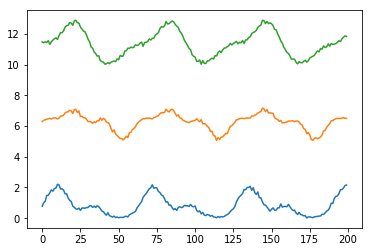

In [10]:
# split
X_train, X_test = train_test_split(X_norm, train_size=0.8, random_state=8888)

from utils import buildNetwork

# train autoencoder
print("autoencoder")
autoencoder, encoder = buildNetwork(X_norm.shape[1], encoding_dim_ae = 3)
N_epochs = 25
autoencoder.fit(
  X_train,
  X_train,
  epochs=N_epochs,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_norm)

# plot
myPlot(X_enc)

## AE without PCA: reduce to 2

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 2s - loss: 0.0462 - val_loss: 0.0441
Epoch 2/25
80000/80000 [==============================] - 2s - loss: 0.0393 - val_loss: 0.0337
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0288 - val_loss: 0.0247
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0215 - val_loss: 0.0187
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0167 - val_loss: 0.0149
Epoch 6/25
80000/80000 [==============================] - 1s - loss: 0.0137 - val_loss: 0.0127
Epoch 7/25
80000/80000 [==============================] - 2s - loss: 0.0122 - val_loss: 0.0119
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0117
Epoch 9/25
80000/80000 [==============================] - 2s - loss: 0.0117 - val_loss: 0.0116
Epoch 10/25
80000/80000 [==============================] - 1s - loss: 0.0116 - val_

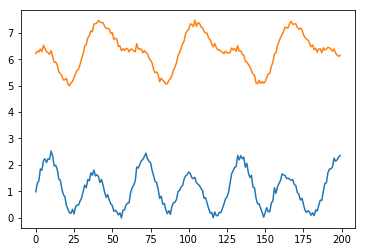

In [11]:
# split
X_train, X_test = train_test_split(X_norm, train_size=0.8, random_state=8888)

from utils import buildNetwork

# train autoencoder
print("autoencoder")
autoencoder, encoder = buildNetwork(X_norm.shape[1], encoding_dim_ae = 2)
autoencoder.fit(
  X_train,
  X_train,
  epochs=N_epochs,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_norm)

# plot
myPlot(X_enc)

## PCA without dim reduction

PCA
X_pca_2 [[  3.47484144e-02  -1.05492779e-01   1.80723854e-02   1.47581444e-01
   -1.77832712e-01  -6.67594235e-02]
 [  3.55306023e-01   2.12514685e-01  -2.92968346e-02  -1.53110597e-02
    1.14649543e-01  -1.87383813e-02]
 [  4.75348593e-01   2.79626885e-01  -8.23541256e-02   2.06495550e-02
   -1.68559030e-01  -5.12012937e-02]
 [  7.42288868e-01   6.83471504e-01  -3.53041664e-01   1.53349053e-01
   -1.76572905e-01  -1.00566423e-01]
 [  9.23368265e-01   6.07178761e-01  -3.47688167e-01  -1.09228256e-03
   -7.66305770e-02  -2.07722286e-01]
 [  9.92031287e-01   1.01983740e+00  -3.86522676e-01  -9.89540456e-02
   -8.55912013e-02   4.47415805e-02]
 [  1.24928018e+00   9.81706476e-01  -6.43894654e-01   1.35182638e-01
   -7.75395758e-02  -2.11373020e-02]
 [  1.37216189e+00   8.37840034e-01  -5.23925086e-01   2.46061973e-02
   -9.94922502e-02   2.78322773e-02]
 [  1.71705333e+00   9.32076275e-01  -6.55095879e-01  -1.37125042e-01
   -4.96154854e-02   4.66615677e-03]
 [  1.72882619e+00   8.76

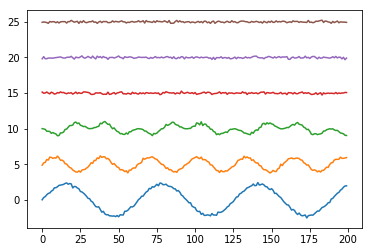

In [5]:
print("PCA")
encoding_dim_pca = X.shape[1] # 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca_2 = pca.fit_transform(X)
print("X_pca_2",X_pca_2[0:10,:])

print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))

# plot
myPlot(X_pca_2)

## PCA with dimensionality reduction

PCA MLE
X_pca_1 [[ 0.03474841 -0.10549278  0.01807239]
 [ 0.35530602  0.21251468 -0.02929683]
 [ 0.47534859  0.27962688 -0.08235413]
 [ 0.74228887  0.6834715  -0.35304166]
 [ 0.92336826  0.60717876 -0.34768817]
 [ 0.99203129  1.0198374  -0.38652268]
 [ 1.24928018  0.98170648 -0.64389465]
 [ 1.37216189  0.83784003 -0.52392509]
 [ 1.71705333  0.93207628 -0.65509588]
 [ 1.72882619  0.87695119 -0.71866614]]
Explained variance ratio (cumsum) [ 0.75803365  0.91221382  0.99095633]


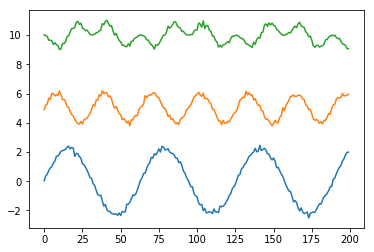

In [6]:
print("PCA MLE")
encoding_dim_pca = 3 # 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca_1 = pca.fit_transform(X)
print("X_pca_1",X_pca_1[0:10,:])

print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))

# plot
myPlot(X_pca_1)

## Normalize PCA output

Use the one with dimensionality reduction, otherwise worse results

To test using the one without dimensionality reduction,
replace `X_pca_use = X_pca_1` with `X_pca_use = X_pca_2`

X_pca_use normalized [[ 0.50271309  0.4580017   0.50065471]
 [ 0.564895    0.57468857  0.48239804]
 [ 0.58818091  0.59931414  0.46194912]
 [ 0.6399621   0.74749734  0.35762289]
 [ 0.67508796  0.71950315  0.35968619]
 [ 0.68840725  0.8709205   0.34471891]
 [ 0.7383085   0.85692907  0.24552465]
 [ 0.76214515  0.80413998  0.29176237]
 [ 0.82904734  0.8387182   0.24120756]
 [ 0.83133105  0.81849109  0.21670682]]


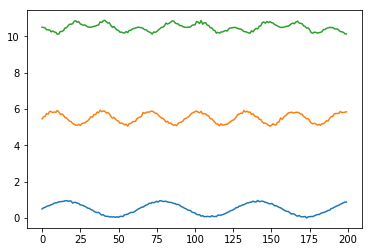

In [7]:
# choose the PCA with the dimensionality reduction
X_pca_use = X_pca_1
X_pca_use = myNorm3(X_pca_use)
print("X_pca_use normalized",X_pca_use[0:10,:])
myPlot(X_pca_use)

## AE with PCA: keep at 3

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 2s - loss: 0.0626 - val_loss: 0.0531
Epoch 2/25
80000/80000 [==============================] - 1s - loss: 0.0422 - val_loss: 0.0306
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0196 - val_loss: 0.0102
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0049 - val_loss: 0.0016
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 8.4474e-04 - val_loss: 5.3210e-04
Epoch 6/25
80000/80000 [==============================] - 2s - loss: 4.4101e-04 - val_loss: 3.9548e-04
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 3.7434e-04 - val_loss: 3.6122e-04
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 3.4989e-04 - val_loss: 3.4602e-04
Epoch 9/25
80000/80000 [==============================] - 1s - loss: 3.3630e-04 - val_loss: 3.3244e-04
Epoch 10/25
80000/80000 [==================

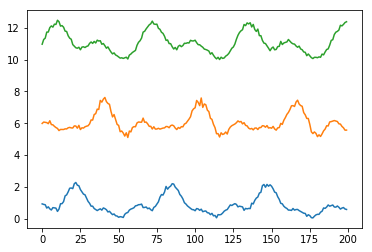

In [12]:
# Use the PCA with dimensionality reduction
# If using the one without dimensionality reduction, result won't be as good
# split
X_train, X_test = train_test_split(X_pca_use, train_size=0.8, random_state=8888)

# train autoencoder
print("autoencoder")
autoencoder, encoder = buildNetwork(X_pca_use.shape[1], encoding_dim_ae = 3)
autoencoder.fit(
  X_train,
  X_train,
  epochs=N_epochs,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_pca_use)
# print("encoded",X_enc)
# # X_enc_dec = decoder.predict(X_enc)
# # print("enc-dec",X_enc_dec)
# X_rec = autoencoder.predict(X_pca)
# print("recoded",X_rec)

# plot
# from matplotlib import pyplot as plt
myPlot(X_enc)

## AE with PCA: reduce to 2

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 2s - loss: 0.0604 - val_loss: 0.0533
Epoch 2/25
80000/80000 [==============================] - 1s - loss: 0.0465 - val_loss: 0.0404
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0301
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0260 - val_loss: 0.0225
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0195 - val_loss: 0.0170
Epoch 6/25
80000/80000 [==============================] - 1s - loss: 0.0154 - val_loss: 0.0144
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0137
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0134
Epoch 9/25
80000/80000 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0133
Epoch 10/25
80000/80000 [==============================] - 1s - loss: 0.0133 - val_

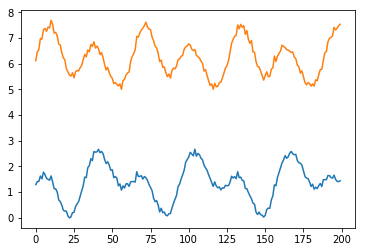

In [13]:
# Use the PCA with dimensionality reduction
# If using the one without dimensionality reduction, result won't be as good
# split
X_train, X_test = train_test_split(X_pca_use, train_size=0.8, random_state=8888)

# train autoencoder
print("autoencoder")
autoencoder, encoder = buildNetwork(X_pca_use.shape[1], encoding_dim_ae = 2)
autoencoder.fit(
  X_train,
  X_train,
  epochs=N_epochs,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_pca_use)
# print("encoded",X_enc)
# # X_enc_dec = decoder.predict(X_enc)
# # print("enc-dec",X_enc_dec)
# X_rec = autoencoder.predict(X_pca)
# print("recoded",X_rec)

# plot
# from matplotlib import pyplot as plt
myPlot(X_enc)